In [47]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from string import digits

# 1. 데이터 로드
df = pd.read_csv('TSLA.csv')
data = df.drop(columns=['Date','Volume','Adj Close'])
data

,Open,High,Low,Close
0,3.800000,5.000000,3.508000,4.778000
1,5.158000,6.084000,4.660000,4.766000
2,5.000000,5.184000,4.054000,4.392000
3,4.600000,4.620000,3.742000,3.840000
4,4.000000,4.000000,3.166000,3.222000
...,...,...,...,...
2951,874.489990,907.849976,867.390015,905.390015
2952,914.979980,942.849976,907.090027,921.159973
2953,930.000000,997.859985,921.750000,993.979980
2954,979.940002,1040.699951,976.400024,999.109985


In [48]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)



In [50]:
# 3. 시퀀스 생성

window = 6
X, y = [], []

for i in range(len(data) - window):
    X.append(data[i:i+window])         
    y.append(data[i+window, -1])       

X = np.array(X)
y = np.array(y)

X.shape, y.shape


((2950, 6, 4), (2950,))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2360, 6, 4), (2360,), (590, 6, 4), (590,))

In [67]:
# 4. RNN 모델
modelRNN = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,4)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
modelRNN.compile(optimizer='adam', loss='mse')
modelRNN.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100


/opt/homebrew/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.0369e-04
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4227e-06  
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 3.6610e-06
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0998e-06  
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 2.7348e-06
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 2.4470e-06
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2064e-06  
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1568e-06  
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0809e-06  
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1556e-06  
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8322e-06  
Epoch 12/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8732e-06  
Epoch 13/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6429e-06  
Epoch 14/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6101e-06  
E

In [73]:
# 4. LSTM 모델
modelLSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,4)),
    tf.keras.layers.Dense(1)
])
modelLSTM.compile(optimizer='adam', loss='mse')
modelLSTM.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)



Epoch 1/100


/opt/homebrew/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 6.0359e-05
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 2.7505e-06
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 2.7643e-06
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 2.7670e-06
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7163e-06  
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 2.7117e-06
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 2.6759e-06
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 2.9564e-06
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 2.6470e-06
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 2.6457e-06
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 2.5495e-06
Epoch 12/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 2.4036e-06
Epoch 13/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 2.5611e-06
Epoch 14/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 2.7206e-06

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


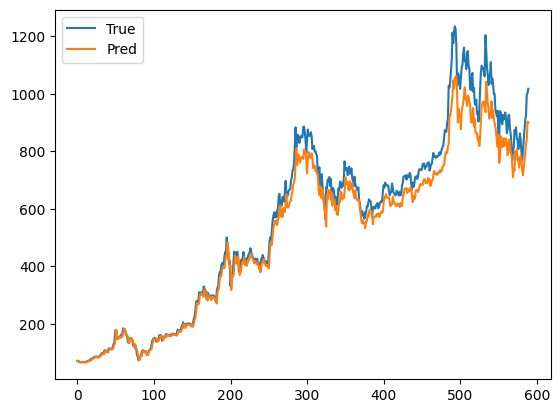

MSE: 3744.0097057942103


In [68]:
# 5. 예측 및 평가
predRNN = modelRNN.predict(X_test)
dummy = np.zeros((y_test.shape[0], 3))   # 더미 피처
y_test_4d = np.concatenate([y_test.reshape(-1,1), dummy], axis=1)
y_true = scaler.inverse_transform(y_test_4d)[:,0]   # 첫 컬럼만 사용

predRNN_4d = np.concatenate([predRNN, np.zeros((predRNN.shape[0],3))], axis=1)
y_pred = scaler.inverse_transform(predRNN_4d)[:,0]

plt.plot(y_true, label="True")
plt.plot(y_pred, label="Pred")
plt.legend(); plt.show()

mseRNN = np.mean((y_true - y_pred) ** 2)
print("MSE:", mseRNN)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


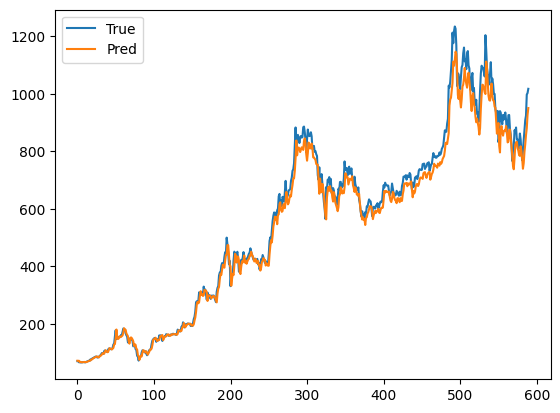

MSE: 1573.965720664786


In [74]:
predLSTM = modelLSTM.predict(X_test)
dummy = np.zeros((y_test.shape[0], 3))   # 더미 피처
y_test_4d = np.concatenate([y_test.reshape(-1,1), dummy], axis=1)
y_true = scaler.inverse_transform(y_test_4d)[:,0]   # 첫 컬럼만 사용

predLSTM_4d = np.concatenate([predLSTM, np.zeros((predRNN.shape[0],3))], axis=1)
y_pred = scaler.inverse_transform(predLSTM_4d)[:,0]

plt.plot(y_true, label="True")
plt.plot(y_pred, label="Pred")
plt.legend(); plt.show()

mseLSTM = np.mean((y_true - y_pred) ** 2)
print("MSE:", mseLSTM)